# <font style="color:rgb(50,120,229)">Objective </font>
You have seen how we convert from one color space to another and also the theory behind the color spaces. In this assignment, you will implement the function cvtColor using the conversion formulae given in the opencv website. Specifically, you will be implementing the 2 functions:
1. convertBGRtoGray ( 10 points )
1. convertBGRtoHSV ( 20 points )

We have created the outline of the functions along with the supporting code. You just have to implement the formula in the function.

**Parameters**

**Input**
- BGR image ( named img )

**Output**
- Gray or HSV image

In [77]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

In [78]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [79]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [80]:
img = cv2.imread(DATA_PATH+"images/sample.jpg")

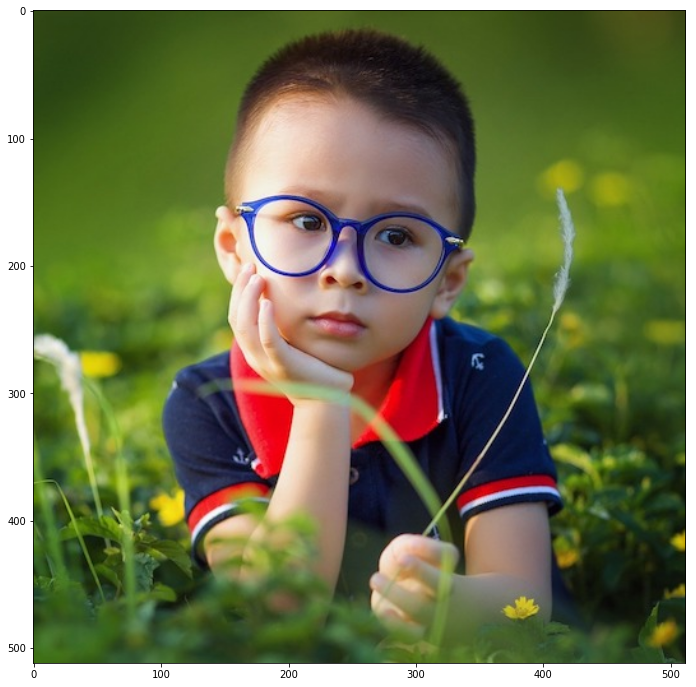

In [81]:
plt.imshow(img[:,:,::-1])
plt.show()

#### <font style="color:rgb(50,120,229)">Convert BGR image to Grayscale image</font>
- Input: image in BGR mode
- Output: image in grayscale mode

For your convenience, we have added the conversion formula below
![BGR to Gray formula](https://www.dropbox.com/s/2zuuigf5cpocs75/bgr2gray_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html


In [82]:
def convertBGRtoGray(image):
    ###
    if image.shape[2] == 4:  # If the image has an alpha channel
        B,G,R, A = cv2.split(image)
    else:  # If no alpha channel
        B,G,R = cv2.split(image)
    
    Y = 0.299*R+0.587*G+0.114*B
    
    return Y.astype(np.uint8)
    ###


In [83]:
gray = convertBGRtoGray(img)

Get the result from OpenCV's `cvtColor` function to verify

In [84]:
gray_cv = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

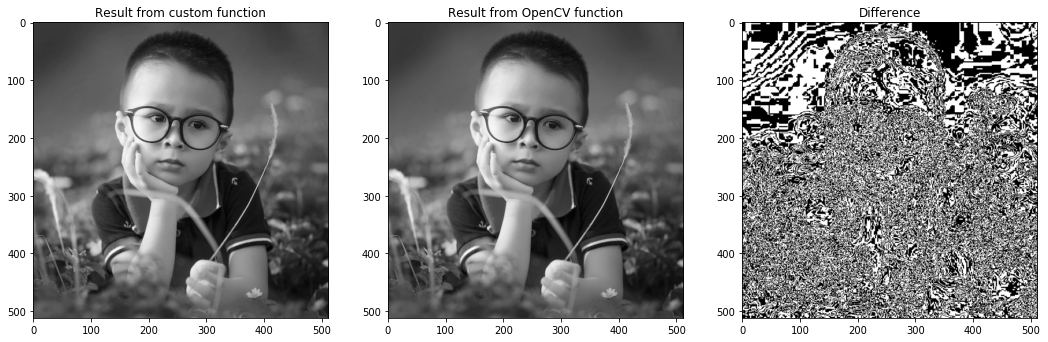

In [85]:
plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(gray,cmap="gray")
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv,cmap="gray")
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(gray-gray_cv),cmap="gray")
plt.show()

In [86]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### <font style="color:rgb(50,120,229)">Convert BGR image to HSV image</font>
- Input: image in BGR mode
- Output: image in HSV mode

For your convenience, we have added the conversion formula below
![BGR to HSV formula](https://www.dropbox.com/s/btdrk2qxd9knav1/bgr2hsv_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

You can assume we are working with 8 bit images.

In [87]:
def convertBGRtoHSV(image):
    ###
    bit_depth = image.dtype

    # Separate channels
    

    # Normalize to the 0 to 1 range based on bit depth
    if bit_depth == np.uint8:  # 8-bit image
        image= image/255.0
    elif bit_depth == np.uint16:  # 16-bit image
        image=image/ 65535.0
        
        ###
    if image.shape[2] == 4:  # If alpha channel is present
        B,G,R,A = cv2.split(image)
    else:
        B,G,R = cv2.split(image)
    V = np.max([R,G,B], axis=0)
    S = np.zeros_like(V)
    H = np.zeros_like(V)
    
    min_vals = np.min([R, G, B], axis=0) 
    
    mask = V != 0
    S[mask] = (V[mask] - min_vals[mask]) / V[mask]  # Calculate S

    # Calculate H for different cases based on which channel is the maximum
    # For Red (R is the max)
    mask_r = (V == R)
    H[mask_r] = (60 * (G[mask_r] - B[mask_r])) / (V[mask_r] - min_vals[mask_r])

    # For Green (G is the max)
    mask_g = (V == G)
    H[mask_g] = (60 * (B[mask_g] - R[mask_g])) / (V[mask_g] - min_vals[mask_g]) + 120

    # For Blue (B is the max)
    mask_b = (V == B)
    H[mask_b] = (60 * (R[mask_b] - G[mask_b])) / (V[mask_b] - min_vals[mask_b]) + 240

    # Ensure H is between 0 and 360
    H = (H + 360) % 360

        

    if bit_depth == np.uint8:  # 8-bit image
        V = V * 255.0
        S = S * 255.0
        H = H * 2
    elif bit_depth == np.uint16:  # 16-bit image
        V = V * 65535.0
        S = S * 65535.0
        H = H * 65535.0
        
    
    if image.shape[2] == 4:  # If alpha channel is present, include it in the result
        return cv2.merge([H.astype(np.uint8), S.astype(np.uint8), V.astype(np.uint8), A])
    else:
        return cv2.merge([H.astype(np.uint8), S.astype(np.uint8), V.astype(np.uint8)])


In [88]:
hsv = convertBGRtoHSV(img)

Get the result from OpenCV's `cvtColor` function to verify

In [89]:
hsv_cv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

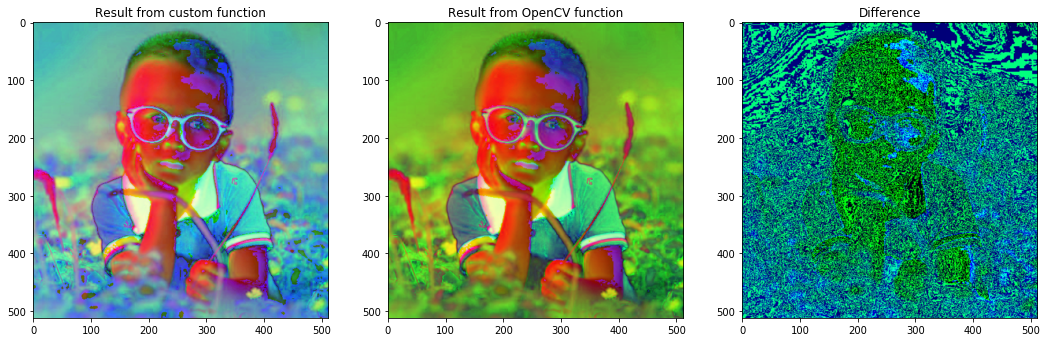

In [90]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(hsv[:,:,::-1])
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:,:,::-1])
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(hsv-hsv_cv)[:,:,::-1])
plt.show()

In [91]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
